In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/padhai-text-non-text-classification-level-4b/padhai.py
/kaggle/input/padhai-text-non-text-classification-level-4b/sample_submission_level_4b.csv
/kaggle/input/padhai-text-non-text-classification-level-4b/level_4b_test/kaggle_level_4b/1854.jpg
/kaggle/input/padhai-text-non-text-classification-level-4b/level_4b_test/kaggle_level_4b/856.jpg
/kaggle/input/padhai-text-non-text-classification-level-4b/level_4b_test/kaggle_level_4b/372.jpg
/kaggle/input/padhai-text-non-text-classification-level-4b/level_4b_test/kaggle_level_4b/1478.jpg
/kaggle/input/padhai-text-non-text-classification-level-4b/level_4b_test/kaggle_level_4b/1586.jpg
/kaggle/input/padhai-text-non-text-classification-level-4b/level_4b_test/kaggle_level_4b/536.jpg
/kaggle/input/padhai-text-non-text-classification-level-4b/level_4b_test/kaggle_level_4b/1509.jpg
/kaggle/input/padhai-text-non-text-classification-level-4b/level_4b_test/kaggle_level_4b/1303.jpg
/kaggle/input/padhai-text-non-text-classification-level-4b/l

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, log_loss
import operator
import json
from IPython import display
import os
import warnings
from tqdm import tqdm_notebook
import numpy.lib.recfunctions as nlr
from sklearn.utils import shuffle

In [3]:
import glob
def dir(paths,L=[]):
    #for i in path:
    for infile in glob.glob(os.path.join(paths,'*.*')):
        L.append(infile)
L1 = []
L2 = []
L3 = []
L4 = []
L5 = []
paths = dir("/kaggle/input/padhai-text-non-text-classification-level-4b/level_4b_train/level_4b/ta",L1)
paths = dir("/kaggle/input/padhai-text-non-text-classification-level-4b/level_4b_train/level_4b/hi",L2)
paths = dir("/kaggle/input/padhai-text-non-text-classification-level-4b/level_4b_train/level_4b/en",L3)
paths = dir("/kaggle/input/padhai-text-non-text-classification-level-4b/level_4b_train/level_4b/background",L4)

paths = dir("/kaggle/input/padhai-text-non-text-classification-level-4b/level_4b_test/kaggle_level_4b",L5)
print (len(L5))

L6 = []
for j in range(3000):
    L6.append([L5[j][i:i+1] for i in range(0, len(L5[0]), 1)][86:])
#print((L6))
L7 = []
for k in range(3000):
    L7.append(L6[k][3:7])
    
L8 = []
for l in range(3000):
    res = "".join(L7[l])
    L8.append(res)
L9 = [i.split('j', 1)[0] for i in L8]
L10 = []
for m in range(3000):
    n=float(L9[m])
    L10.append(n)
L11 = []
for o in range(3000):
    p = int(L10[o])
    L11.append(p)

ImageId1 = np.asarray(L11)
ImageId = pd.DataFrame(data=ImageId1)
ImageId

3000


,0
0,1854
1,856
2,372
3,1478
4,1586
...,...
2995,2988
2996,2797
2997,1461
2998,566


In [4]:
from PIL import Image
from PIL import ImageFilter
def im(L=[]):
    data3 = []
    for i in L:
        image = Image.open(i,'r')
        image = image.filter(ImageFilter.GaussianBlur(radius=1.5))
        image = image.filter(ImageFilter.MedianFilter(size=3))

        width, height = image.size
        data = list(image.getdata())
        if image.mode == 'RGB':
            channels = 3
        elif image.mode == 'L':
            channels = 1
        else:
            print("Unknown mode: %s" % image.mode)
            return None
        
        data = np.array(data).reshape((width, height, channels))
        data1 = np.array(data)
        data2 = np.reshape(data1,(-1,3))
        data3.append(data2)
        b = np.array(data3)
    return(b)

LR = L1+L2+L3+L4
X_train = im(LR)

In [5]:
X_test = im(L5)

In [6]:
sc = StandardScaler()

v = np.reshape(X_train,(36864000,3))
h = v.transpose()
tr = np.reshape(h,(3,9000,4096))

red = tr[0]
green = tr[1]
blue = tr[2]

sc.fit(red)
sc.fit(green)
sc.fit(blue)

red = sc.transform(red)
green = sc.transform(green)
blue = sc.transform(blue)

trs = np.concatenate(([red],[green],[blue]))
trp = np.reshape(trs,(3,36864000))

ff = trp.transpose()
jj = np.reshape(ff,(9000,4096,3))
X_train = np.reshape(jj,(9000,12288))

In [7]:
sc = StandardScaler()

vv = np.reshape(X_test,(12288000,3))
hh = vv.transpose()
trr = np.reshape(hh,(3,3000,4096))

redd = trr[0]
greenn = trr[1]
bluee = trr[2]

sc.fit(redd)
sc.fit(greenn)
sc.fit(bluee)

redd = sc.transform(redd)
greenn = sc.transform(greenn)
bluee = sc.transform(bluee)

trss = np.concatenate(([redd],[greenn],[bluee]))
trpp = np.reshape(trss,(3,12288000))

fff = trpp.transpose()
jjj = np.reshape(fff,(3000,4096,3))
X_test = np.reshape(jjj,(3000,12288))

In [8]:
Ltest1 = [1 for x in range (4500)]
Ltest2 = [0 for x in range (4500)]
Ltest = Ltest1+Ltest2
Y_train = np.asarray(Ltest)
len(Y_train)

9000

In [9]:
X_train, Y_train = shuffle(X_train,Y_train,random_state = 0)

In [10]:
class Perceptron:
  
  def __init__ (self):
    self.w = None
    self.b = None
    
  def model(self, x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0
    
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
    
  def fit(self, X, Y, epochs = 1, lr = 1):
    
    self.w = np.ones(X.shape[1])
    self.b = 0
    
    accuracy = {}
    max_accuracy = 0
    
    wt_matrix = []
    
    for i in range(epochs):
      for x, y in zip(X, Y):
        y_pred = self.model(x)
        if y == 1 and y_pred == 0:
          self.w = self.w + lr * x
          self.b = self.b - lr * 1
        elif y == 0 and y_pred == 1:
          self.w = self.w - lr * x
          self.b = self.b + lr * 1
          
      wt_matrix.append(self.w)    
          
      accuracy[i] = accuracy_score(self.predict(X), Y)
      if (accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        chkptw = self.w
        chkptb = self.b
        
    self.w = chkptw
    self.b = chkptb
        
    print(max_accuracy)
    
    plt.plot(accuracy.values())
    plt.ylim([0, 1])
    plt.show()
    
    return np.array(wt_matrix)

0.9675555555555555


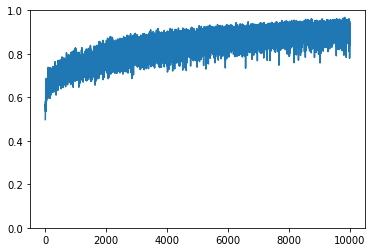

In [11]:
perceptronX = Perceptron()
wt_matrix1 = perceptronX.fit(X_train, Y_train, 10000, 0.01)

In [12]:
Y_pred_test = perceptronX.predict(X_test)

In [13]:
dft = pd.DataFrame(Y_pred_test)
d = pd.concat([ImageId,dft],axis=1)
d.columns = ['ImageId','Class']
d['Class'].replace(True,'1',inplace = True)
d['Class'].replace(False,'0',inplace = True)
d = d[['ImageId', 'Class']]
d.sort_values(by=['ImageId'])
d.groupby('Class').count()

,ImageId
Class,
0,1439
1,1561


In [14]:
d.to_csv("submission.csv", index=False)